In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Reading file

In [3]:
df = pd.read_csv("C:/Users/Sravanthi/Downloads/archive/bestsellers with categories.csv")
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [4]:
df.shape

(550, 7)

In [5]:
df.dtypes

Name            object
Author          object
User Rating    float64
Reviews          int64
Price            int64
Year             int64
Genre           object
dtype: object

## Histograms

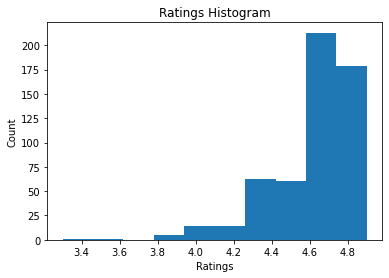

In [6]:
plt.hist(df['User Rating'])
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.title('Ratings Histogram')
plt.show()

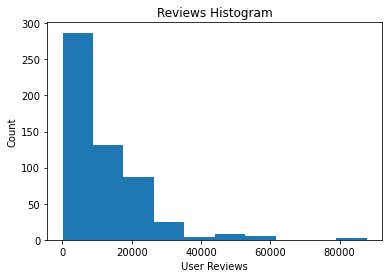

In [7]:
plt.hist(df['Reviews'])
plt.xlabel('User Reviews')
plt.ylabel('Count')
plt.title('Reviews Histogram')
plt.show()

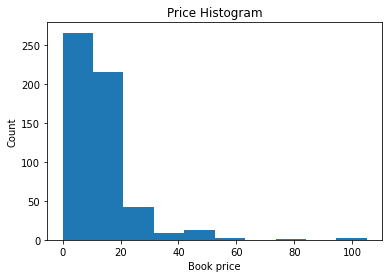

In [8]:
plt.hist(df['Price'])
plt.xlabel('Book price')
plt.ylabel('Count')
plt.title('Price Histogram')
plt.show()

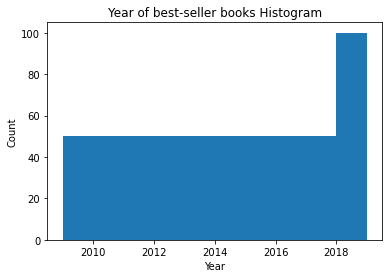

In [9]:
plt.hist(df['Year'])
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Year of best-seller books Histogram')
plt.show()

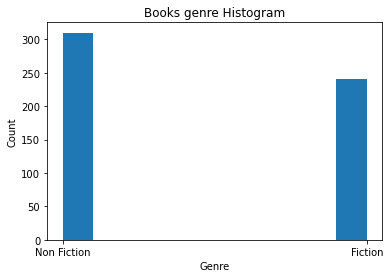

In [10]:
plt.hist(df['Genre'])
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Books genre Histogram')
plt.show()

## Identifying outliers

In [243]:
def identify_outliers(df, column):
    L = list()
    IQR = df[column].quantile(0.75)-df[column].quantile(0.25)
    Lowerfence_Rating = (df[column].quantile(0.25) - (1.5 * IQR))
    Upperfence_Rating = (df[column].quantile(0.75) + (1.5 * IQR))
    for x in df[column]:
        if x > Upperfence_Rating or x < Lowerfence_Rating :
            L.append(x)
    L.sort()
    print('Lowerfence_Rating is', Lowerfence_Rating)
    print('Lowerfence_Rating is', Upperfence_Rating)
    print('The existing outliers for', column, 'is', L)

In [244]:
identify_outliers(df, 'User Rating')
identify_outliers(df, 'Reviews')
identify_outliers(df, 'Price')

Lowerfence_Rating is 4.050000000000001
Lowerfence_Rating is 5.25
The existing outliers for User Rating is [3.3, 3.6, 3.8, 3.8, 3.9, 3.9, 3.9, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0]
Lowerfence_Rating is -15734.875
Lowerfence_Rating is 37046.125
The existing outliers for Reviews is [39459, 47265, 47265, 49288, 49288, 50482, 50482, 50482, 50482, 57271, 57271, 57271, 61133, 61133, 79446, 79446, 87841]
Lowerfence_Rating is -6.5
Lowerfence_Rating is 29.5
The existing outliers for Price is [30, 30, 30, 30, 30, 32, 32, 36, 39, 40, 40, 40, 40, 40, 42, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 52, 53, 54, 82, 105, 105]


## Descriptive characteristics

In [13]:
Mean = df['User Rating'].mean()
print('The mean of User Rating is:', Mean)
Mode = df['User Rating'].mode()
print('The mode of User Rating is:', Mode)
Spread = df['User Rating'].var()
print('The spread of User Rating is:', Spread)
Tails = df['User Rating'].tail()
print('The tail of User Rating is:', Tails)

The mean of User Rating is: 4.618363636363641
The mode of User Rating is: 0    4.8
dtype: float64
The spread of User Rating is: 0.05152008610697112
The tail of User Rating is: 545    4.9
546    4.7
547    4.7
548    4.7
549    4.7
Name: User Rating, dtype: float64


In [14]:
Mean = df['Reviews'].mean()
print('The mean of Reviews is:', Mean)
Mode = df['Reviews'].mode()
print('The mode of Reviews is:', Mode)
Spread = df['Reviews'].var()
print('The spread of Reviews is:', Spread)
Tails = df['Reviews'].tail()
print('The tail of Reviews is:', Tails)

The mean of Reviews is: 11953.281818181818
The mode of Reviews is: 0    8580
dtype: int64
The spread of Reviews is: 137619458.4104157
The tail of Reviews is: 545     9413
546    14331
547    14331
548    14331
549    14331
Name: Reviews, dtype: int64


In [15]:
Mean = df['Price'].mean()
print('The mean of Price is:', Mean)
Mode = df['Price'].mode()
print('The mode of Price is:', Mode)
Spread = df['Price'].var()
print('The spread of Price is:', Spread)
Tails = df['Price'].tail()
print('The tail of Price is:', Tails)

The mean of Price is: 13.1
The mode of Price is: 0    8
dtype: int64
The spread of Price is: 117.55464480874357
The tail of Price is: 545    8
546    8
547    8
548    8
549    8
Name: Price, dtype: int64


In [16]:
Mean = df['Year'].mean()
print('The mean of Year is:', Mean)
Mode = df['Year'].mode()
print('The mode of Year is:', Mode)
Spread = df['Year'].var()
print('The spread of Year is:', Spread)
Tails = df['Year'].tail()
print('The tail of Year is:', Tails)

The mean of Year is: 2014.0
The mode of Year is: 0     2009
1     2010
2     2011
3     2012
4     2013
5     2014
6     2015
7     2016
8     2017
9     2018
10    2019
dtype: int64
The spread of Year is: 10.018214936247723
The tail of Year is: 545    2019
546    2016
547    2017
548    2018
549    2019
Name: Year, dtype: int64


## Plotting Probability Mass Function(PMF)

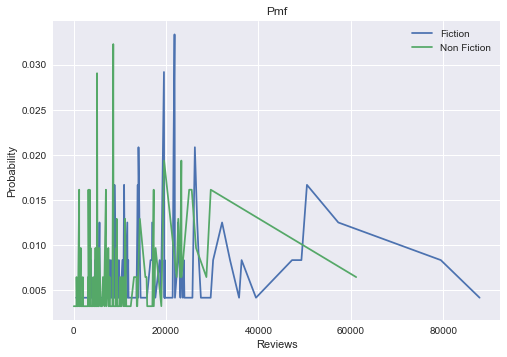

In [245]:
from empiricaldist import Pmf

def decorate_pmf(title, x, y):
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(title)

for name, group in df.groupby('Genre'):
    Pmf.from_seq(group.Reviews).plot()

title, x, y = 'Pmf','Reviews', 'Probability'
decorate_cdf(title,x,y)

plt.legend(df.groupby('Genre').groups.keys())

## Plotting Cumulative Distribution Function(CDF)

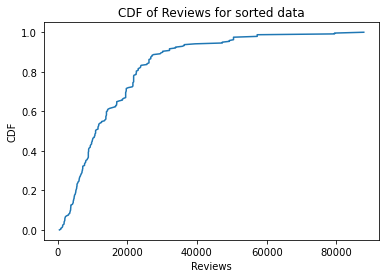

In [51]:
df_fiction = df[df['Genre'] == "Fiction"]
x = np.sort(df_fiction.Reviews)
y = np.arange(len(df_fiction.Reviews))/float(len(df_fiction.Reviews)-1)
plt.xlabel('Reviews')
plt.ylabel('CDF')
plt.title('CDF of Reviews for sorted data')
plt.plot(x,y)



## Normal or Gaussian Distribution

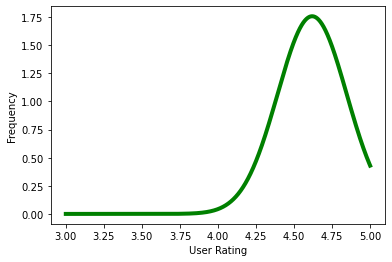

In [89]:
#Plotting normal distribution for user rating

import scipy as sp
from scipy.stats import norm
ratings_mean = df['User Rating'].mean()
ratings_std = df['User Rating'].std()
x = np.arange(3, 5, 0.0005)
plt.xlabel('User Rating')
plt.ylabel('Frequency')
plt.plot(x, norm.pdf(x, ratings_mean, ratings_std), color='green', linewidth=4)

## Scatter plots

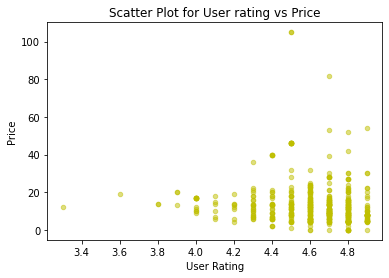

In [95]:
#Scatter plot between User ratings and price

df.plot(kind = 'scatter', x = 'User Rating', y = 'Price',alpha = 0.5,color = 'y')
plt.xlabel('User Rating')
plt.ylabel('Price')
plt.title('Scatter Plot for User rating vs Price')   
plt.show()

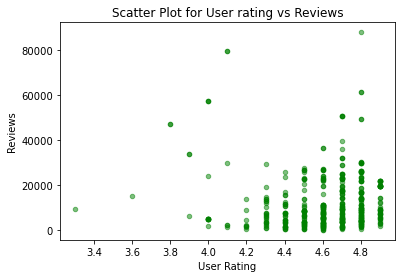

In [159]:
#Scatter plot between User rating and reviews
df.plot(kind = 'scatter', x = 'User Rating', y = 'Reviews',alpha = 0.5,color = 'g')
plt.xlabel('User Rating')
plt.ylabel('Reviews')
plt.title('Scatter Plot for User rating vs Reviews')   
plt.show()

In [98]:
#Dropping missing values

cleansed_Data = df.dropna(subset=['User Rating', 'Price'])

## Covariance & Correlation

In [99]:
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

In [100]:
#Co-variance
Ratings, Prices = cleansed_Data['User Rating'], cleansed_Data['Price']
Cov(Ratings, Prices)

-0.3269272727272727

In [107]:
def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = np.mean(xs), np.var(xs)
    meany, vary = np.mean(ys), np.var(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr

In [108]:
#Pearsons Correlation coefficient
Corr(Ratings, Prices)

-0.13308628728087998

In [109]:
#Spearman's correlation
def SpearmanCorr(xs, ys):
    xs = pd.Series(xs)
    ys = pd.Series(ys)
    return xs.corr(ys, method='spearman')

In [110]:
SpearmanCorr(Ratings, Prices)

-0.23106979558156984

## Plotting correlation

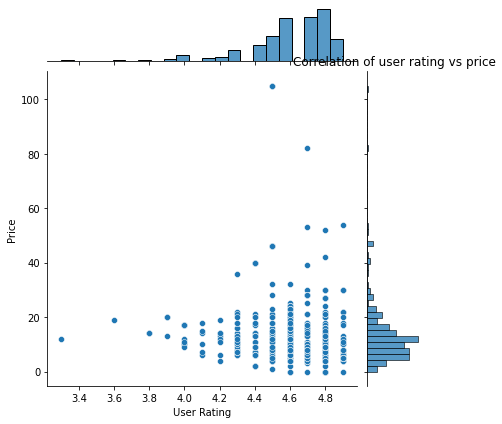

In [170]:
#Correlation between User rating and Price

sns.jointplot(x='User Rating',y='Price',data=cleansed_Data)
plt.title('Correlation of user rating vs price')
plt.show()

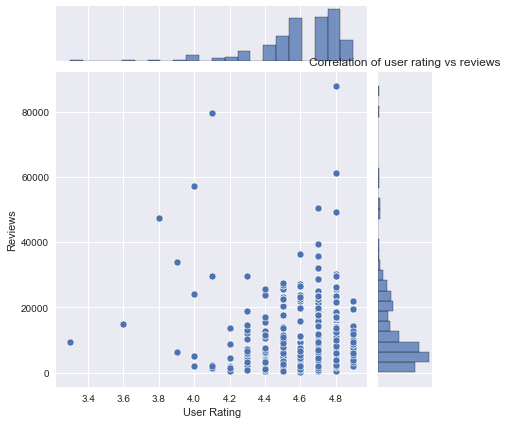

In [242]:
#Correlation between User rating and reviews

sns.jointplot(x='User Rating',y='Reviews',data=cleansed_Data)
plt.title('Correlation of user rating vs reviews')
plt.show()

## Heatmap

<AxesSubplot:>

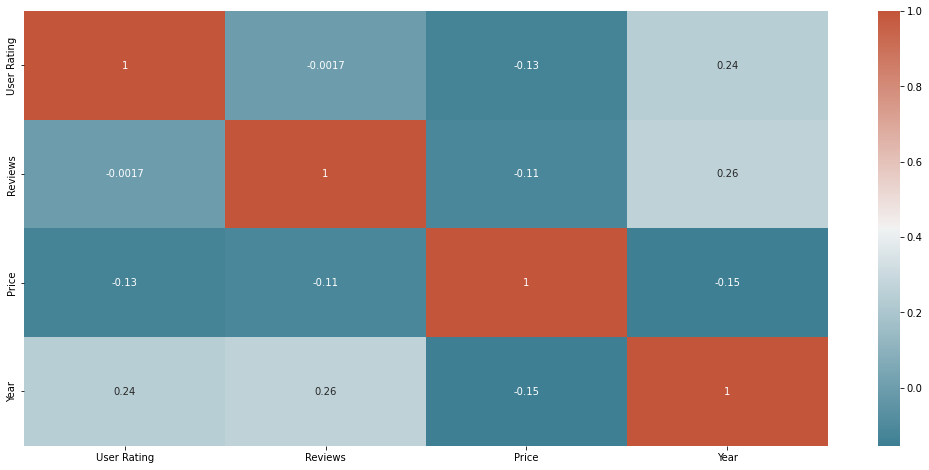

In [168]:
#Heatmap

plt.figure(figsize=(18,8))

corre = df.select_dtypes(include=['int64','float64']).corr()
sns.heatmap(corre, xticklabels = corre.columns, yticklabels = corre.columns, annot = True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

## Hypothesis testing

In [167]:
#Classical hypothesis testing on User Rating
stat, p_value = sp.stats.ttest_rel(df['User Rating'],df['Price'])
print('p-value: ',p_value)

p-value:  1.0274904064983002e-58


## Multiple linear regression

In [227]:
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]
from sklearn.preprocessing import LabelEncoder
X = X.apply(pd.to_numeric, errors='coerce')
Y = Y.apply(pd.to_numeric, errors='coerce')
X.fillna(0, inplace=True)
Y.fillna(0, inplace=True)
le = LabelEncoder()
X.iloc[:, 1] = le.fit_transform(X.iloc[:, 1])
X.iloc[:, 4] = le.fit_transform(X.iloc[:, 4])

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [5])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [231]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [232]:
accuracy = regressor.score(X_test, Y_test)
print('Accuracy = '+ str(accuracy))

Accuracy = 1.0
